# 第九周作业参考

之前大家对qda和lda已经比较熟了，本周作业也都做得挺好的，很多同学都在作业中体现了自己的思考。

可以参考下其他同学的思路以及代码编写方式。

# 参考一 2019202091-徐克丰
# 第一题
## 题目描述
从正态分布$C_1=N(\left(\begin{array}{cc}-1.5 \\ -1\end{array}\right),\Sigma_1)$和$C_2=N(\left(\begin{array}{cc}2\\ 1\end{array}\right),\Sigma_2)$，
$\Sigma_1=\left(\begin{array}{cc}1&\rho_1\\ \rho_1&1\end{array}\right)$和
$\Sigma_2=\left(\begin{array}{cc}1&\rho_2\\ \rho_2&1\end{array}\right)$进行如下比较分析：

1.令$\rho_1=\rho_2=0$，各类产生随机数100个，每类选择20个作为训练数据，另外80个作为测试数据，比较$LDA$和$QDA$在测试数据上的分类错误率，分析这两个模型哪个模型更适用？

2.令$\rho_1=-0.3，\rho_2=0.8$，重新进行实验，实验方法和1类似，比较$LDA$和$QDA$在测试数据上的分类错误率，分析这两个模型哪个模型更适用？

3.从$t(2)$分布中产生$X_1,X_2$生成50个观测作为$C_3$类，此时需要将$C_3$和$C_2$分开$LDA$和$QDA$哪一种比较理想？以上实验中的$P(C_i),i=1,2,3...$请用每一组参与训练的数据量来估计。

## 第1问

## 代码实现

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.linalg import cholesky
from sklearn.model_selection import train_test_split
#产生二元正态随机数
samplenum=100
mu1=np.array([[-1.5,-1]])
mu2=np.array([[2,1]])
sigma1=np.array([[1,0],[0,1]])
sigma2=np.array([[1,0],[0,1]])
R1=cholesky(sigma1)   #将矩阵分解成LL^T的形式,对于此矩阵，即求矩阵sigma的0.5次幂
R2=cholesky(sigma2)
sample1=np.dot(np.random.randn(samplenum,2),R1)+mu1  #产生标准二元正态，逆运算得到非标准正态分布
sample2=np.dot(np.random.randn(samplenum,2),R2)+mu2
y1=np.ones(100)   #设置分类标签，分为类别1和类别2
y2=np.ones(100)*2

#分成训练集和测试集，训练集0.2，测试集占比0.8
X1_train,X1_test,Y1_train,Y1_test=train_test_split(sample1,y1,test_size=0.8,random_state=1)
X2_train,X2_test,Y2_train,Y2_test=train_test_split(sample2,y2,test_size=0.8,random_state=2)

#LDA线性判别求解,首先求解均值向量和协方差矩阵
miu1=sum(X1_train)/len(X1_train)
miu2=sum(X2_train)/len(X2_train)
cov1=np.cov(X1_train,rowvar=False) #rowvar=false表示按行看成一组观测值
cov2=np.cov(X2_train,rowvar=False)
sw=cov1+cov2 #类内散度矩阵
w=np.dot(np.linalg.inv(sw),(miu1-miu2).reshape(2,1))
w=-w/np.linalg.norm(w)  #由此求解出了LDA的投影方向
print('由LDA得出的投影方向为：(%.3f,%.3f)'%(w.reshape(2)[0],w.reshape(2)[1]))
#用测试集求解分类的错误率,即对于每一个测试样例，求解其投影值，比较到两个类别投影中心点的距离
wmu1=np.dot(w.reshape(1,2),miu1)   #求解每一类别的投影中心点(一维数值)
wmu2=np.dot(w.reshape(1,2),miu2)
err=0  #计数分类错误的个数
for i in range(len(X1_test)):
    val1=np.dot(w.reshape(1,2),X1_test[i]) #求解投影值
    val2=np.dot(w.reshape(1,2),X2_test[i])
    if abs(val1-wmu1)>abs(val1-wmu2):
        err+=1    #如果第一类测试样例到第二类的距离更近，就说明分类错误
    if abs(val2-wmu2)>abs(val2-wmu1):
        err+=1    #如果第二类测试样例到第一类的距离更近，就说明分类错误
print('由LDA线性判别分析分类错误率为：%.3f'%(err/(2*len(X1_test))))

#用QDA求解出一个分界面，先验概率均为p1=p2=0.5,按照多元正态第一种情况来求解，sigma=1
b=(mu1-mu2).reshape(2)
x0=0.5*(mu1+mu2).reshape(2)  #先验概率相等，x0的后一项为0
k1=b[0];k2=b[1];k0=b[0]*x0[0]+b[1]*x0[1]
print('由QDA求出的线性判别分界面为：%.3fx1%.3fx2%.3f=0'%(b[0],b[1],b[0]*x0[0]+b[1]*x0[1]))
#测试QDA的分类错误率
qdaerr=0
for i in range(len(X1_test)):
    val1=k1*X1_test[i].reshape(2)[0]+k2*X1_test[i].reshape(2)[1]+k0
    val2=k1*X2_test[i].reshape(2)[0]+k2*X2_test[i].reshape(2)[1]+k0
    if val1<0:
        qdaerr+=1
    if val2>0:
        qdaerr+=1
print('由QDA求出的分界面对测试集进行测试，分类错误率为：%.3f'%(qdaerr/(2*len(X1_test))))

由LDA得出的投影方向为：(0.828,0.561)
由LDA线性判别分析分类错误率为：0.025
由QDA求出的线性判别分界面为：-3.500x1-2.000x2-0.875=0
由QDA求出的分界面对测试集进行测试，分类错误率为：0.025


## 结果分析
计算出的LDA和QDA分类错误率如代码输出结果所示(由于没有设置随机数种子，所以每次产生的二元正态分布数据有所不同)，但多次运行代码，可以发现LDA和QDA均能够维持在较低的错误率水平上，二者的分类错误率没有太大差异，说明此时LDA和QDA都适用。事实上，由于该问中两个正态分布的协方差矩阵相等，所以二次判别函数中的二次项对于每一类都相同，故此时的判别函数实际上也是一次(线性)判别函数。

## 第2问
## 代码实现

In [26]:
#产生二元正态随机数，该问中二元正态分布的协方差矩阵发生了变化
samplenum=100
mu1=np.array([[-1.5,-1]])
mu2=np.array([[2,1]])
sigma1=np.array([[1,-0.3],[-0.3,1]])
sigma2=np.array([[1,0.8],[0.8,1]])
R1=cholesky(sigma1)   #将矩阵分解成LL^T的形式,对于此矩阵，即求矩阵sigma的0.5次幂
R2=cholesky(sigma2)
sample1=np.dot(np.random.randn(samplenum,2),R1)+mu1  #产生标准二元正态，逆运算得到非标准正态分布
sample2=np.dot(np.random.randn(samplenum,2),R2)+mu2
y1=np.ones(100)   #设置分类标签，分为类别1和类别2
y2=np.ones(100)*2

#分成训练集和测试集，训练集0.2，测试集占比0.8
X1_train,X1_test,Y1_train,Y1_test=train_test_split(sample1,y1,test_size=0.8)
X2_train,X2_test,Y2_train,Y2_test=train_test_split(sample2,y2,test_size=0.8)

#LDA线性判别求解,首先求解均值向量和协方差矩阵
miu1=sum(X1_train)/len(X1_train)
miu2=sum(X2_train)/len(X2_train)
cov1=np.cov(X1_train,rowvar=False) #rowvar=false表示按行看成一组观测值
cov2=np.cov(X2_train,rowvar=False)
sw=cov1+cov2 #类内散度矩阵
w=np.dot(np.linalg.inv(sw),(miu1-miu2).reshape(2,1))
w=-w/np.linalg.norm(w)  #由此求解出了LDA的投影方向
print('由LDA得出的投影方向为：(%.3f,%.3f)'%(w.reshape(2)[0],w.reshape(2)[1]))
#用测试集求解分类的错误率,即对于每一个测试样例，求解其投影值，比较到两个类别投影中心点的距离
wmu1=np.dot(w.reshape(1,2),miu1)   #求解每一类别的投影中心点(一维数值)
wmu2=np.dot(w.reshape(1,2),miu2)
err=0  #计数分类错误的个数
for i in range(len(X1_test)):
    val1=np.dot(w.reshape(1,2),X1_test[i]) #求解投影值
    val2=np.dot(w.reshape(1,2),X2_test[i])
    if abs(val1-wmu1)>abs(val1-wmu2):
        err+=1    #如果第一类测试样例到第二类的距离更近，就说明分类错误
    if abs(val2-wmu2)>abs(val2-wmu1):
        err+=1    #如果第二类测试样例到第一类的距离更近，就说明分类错误
print('由LDA线性判别分析分类错误率为：%.3f'%(err/(2*len(X1_test))))

#用QDA求解出一个分界面，先验概率均为p1=p2=0.5,按照多元正态第三种情况来求解,代入给出的公式，bi0略去了lnP（w）
B1=-0.5*np.linalg.inv(sigma1);B2=-0.5*np.linalg.inv(sigma2)
b1=np.dot(np.linalg.inv(sigma1),mu1.reshape(2,1))
b2=np.dot(np.linalg.inv(sigma2),mu2.reshape(2,1))
b10=-0.5*np.dot(mu1.reshape(1,2),np.dot(np.linalg.inv(sigma1),mu1.reshape(2,1)))-0.5*np.log(abs(np.linalg.det(sigma1)))
b20=-0.5*np.dot(mu2.reshape(1,2),np.dot(np.linalg.inv(sigma2),mu2.reshape(2,1)))-0.5*np.log(abs(np.linalg.det(sigma2)))
B=B1-B2;b=(b1-b2).reshape(2);b0=(b10-b20).reshape(1)
#求解出得出分解面各项的系数
b11=B[0,0];b12=2*B[0,1];b22=B[1,1];u1=b[0];u2=b[1];c=b0[0]
print('由QDA求出的线性判别分界面为：%.3fx1^2%.3fx1x2+%.3fx2^2%.3fx1+%.3fx2%.3f=0'%(b11,b12,b22,u1,u2,c))
#测试QDA的分类错误率
qdaerr=0
for i in range(len(X1_test)):
    val1=b11*(X1_test[i].reshape(2)[0]**2)+b12*X1_test[i].reshape(2)[0]*X1_test[i].reshape(2)[1]  \
    +b22*(X1_test[i].reshape(2)[1]**2)+u1*X1_test[i].reshape(2)[0]+u2*X1_test[i].reshape(2)[1]+c
    val2=b11*(X2_test[i].reshape(2)[0]**2)+b12*X2_test[i].reshape(2)[0]*X2_test[i].reshape(2)[1]  \
    +b22*(X2_test[i].reshape(2)[1]**2)+u1*X2_test[i].reshape(2)[0]+u2*X2_test[i].reshape(2)[1]+c
    if val1<0:
        qdaerr+=1
    if val2>0:
        qdaerr+=1
print('由QDA求出的分界面对测试集进行测试，分类错误率为：%.3f'%(qdaerr/(2*len(X1_test))))

由LDA得出的投影方向为：(0.453,0.892)
由LDA线性判别分析分类错误率为：0.031
由QDA求出的线性判别分界面为：0.839x1^2-2.552x1x2+0.839x2^2-5.311x1+0.073x2-0.244=0
由QDA求出的分界面对测试集进行测试，分类错误率为：0.025


## 结果分析
由QDA求出的判别分解面的表达式为：
$$0.839x_1^2-2.552x1x2+0.839x_2^2-5.311x_1+0.073x_2-0.244=0$$
分类结果如输出所示，结果发现LDA(Fisher)与QDA分类性能相近，故都适合于该分类任务，可能原因是由于所产生的随机数均服从相应的正态分布。

## 第3问

In [27]:
#由自由度为2的t分布随机生成50个二维观测值。有50个C3类，100个C2类
X1=np.random.standard_t(2,50) 
X2=np.random.standard_t(2,50)
sample3=np.c_[X1,X2]
sample2=np.dot(np.random.randn(100,2),R2)+mu2  #这里的C2类采用第二问的正态分布
y2=2*np.ones(100);y3=3*np.ones(50)  #设置分类标签

#分成训练集和测试集，训练集占0.2，有20或10个
X2_train,X2_test,Y2_train,Y2_test=train_test_split(sample2,y2,test_size=0.8)
X3_train,X3_test,Y3_train,Y3_test=train_test_split(sample3,y3,test_size=0.8)

#LDA线性判别求解,首先求解均值向量和协方差矩阵
miu2=sum(X2_train)/len(X2_train)
miu3=sum(X3_train)/len(X3_train)
cov2=np.cov(X2_train,rowvar=False) #rowvar=false表示按行看成一组观测值
cov3=np.cov(X3_train,rowvar=False)
sw=cov2+cov3 #类内散度矩阵
w=np.dot(np.linalg.inv(sw),(miu2-miu3).reshape(2,1))
w=-w/np.linalg.norm(w)  #由此求解出了LDA的投影方向
print('由LDA得出的投影方向为：(%.3f,%.3f)'%(w.reshape(2)[0],w.reshape(2)[1]))
#用测试集求解分类的错误率,即对于每一个测试样例，求解其投影值，比较到两个类别投影中心点的距离
wmu2=np.dot(w.reshape(1,2),miu2)   #求解每一类别的投影中心点(一维数值)
wmu3=np.dot(w.reshape(1,2),miu3)
err=0  #计数分类错误的个数
for i in range(len(X2_test)):
    val2=np.dot(w.reshape(1,2),X2_test[i]) #求解投影值
    if i<len(X3_test):
        val3=np.dot(w.reshape(1,2),X3_test[i])
    if abs(val2-wmu2)>abs(val2-wmu3):
        err+=1    #如果第二类测试样例到第三类的距离更近，就说明分类错误
    if abs(val3-wmu3)>abs(val3-wmu2) and i<len(X3_test):
        err+=1    #如果第三类测试样例到第二类的距离更近，就说明分类错误
print('由LDA线性判别分析分类错误率为：%.3f'%(err/(len(X2_test)+len(X3_test))))

#用QDA求解，先验概率均为p2=2/3，p3=1/3,按照多元正态第三种情况QDA来求解,代入给出的公式
B2=-0.5*np.linalg.inv(sigma2)
b2=np.dot(np.linalg.inv(sigma2),mu2.reshape(2,1))
b20=-0.5*np.dot(mu2.reshape(1,2),np.dot(np.linalg.inv(sigma2),mu2.reshape(2,1)))-0.5*np.log(abs(np.linalg.det(sigma2)))+np.log(2/3)
#注意到C3类并没有协方差矩阵和均值向量，需要自行估计
sigma3=np.cov(X3_train,rowvar=False)
mu3=sum(X3_train)/len(X3_train)
B3=-0.5*np.linalg.inv(sigma3)
b3=np.dot(np.linalg.inv(sigma3),mu3.reshape(2,1))
b30=-0.5*np.dot(mu3.reshape(1,2),np.dot(np.linalg.inv(sigma3),mu3.reshape(2,1)))-0.5*np.log(abs(np.linalg.det(sigma3)))+np.log(1/3)

#进行QDA二次判别分析，得出错误率
def gix(x,B,b,b0):#判别函数计算
    return np.dot(x.reshape(1,2),np.dot(B,x.reshape(2,1)))+np.dot(b.reshape(1,2),x.reshape(2,1))+b0
qdaerr=0
for i in range(len(X2_test)):
    val2=gix(X2_test[i],B2,b2,b20)-gix(X2_test[i],B3,b3,b30)
    if val2<0:
        qdaerr+=1
for i in range(len(X3_test)):
    val3=gix(X3_test[i],B2,b2,b20)-gix(X3_test[i],B3,b3,b30)
    if val3>0:
        qdaerr+=1
print('由QDA求出的分界面对测试集进行测试，分类错误率为：%.3f'%(qdaerr/(len(X2_test)+len(X3_test))))


由LDA得出的投影方向为：(-0.984,0.180)
由LDA线性判别分析分类错误率为：0.192
由QDA求出的分界面对测试集进行测试，分类错误率为：0.200


## 结果分析
将C3和C2分开(C2有100个样例，C3有50个样例)，并用样本的均值和协方差对判别式进行估计。总体而言，QDA的性能要优于LDA，代码结果展示QDA具有更低的错误率，但在随机情况下，也会出现QDA的精度低于LDA(Fisher)的精度。

# 第二题
## 题目描述
用sa心脏病数据，用chd(1：得病，0：正常)对tobacco(吸烟量)+ldl(肥胖指数)+age(年龄)进行BayesLDA和QDA建模，和上次作业中的FisherLDA进行比较，实验中的$P(C_i),i=1,2,3...$请用每一组参与训练的数据量来估计。

## 代码实现

In [28]:
#读入数据
data=pd.read_csv('saheart.csv')
Xpos=data.loc[data['Class']==2,['tobacco','ldl','age']].values
Xneg=data.loc[data['Class']==1,['tobacco','ldl','age']].values
Ypos=data.loc[data['Class']==2,['Class']].values-1
Yneg=data.loc[data['Class']==1,['Class']].values-1
#定义Bayles线性判别函数
def LDAfun(x,sigma,mu,pi):
    inv=np.linalg.inv(sigma)
    return np.dot(x.reshape(1,3),np.dot(inv,x.reshape(3,1)))\
            -0.5*np.dot(mu.reshape(1,3),np.dot(inv,mu.reshape(3,1)))+np.log(pi)
#将数据分成训练集和测试集，测试集用于评估性能,并给出训练集先验概率)
Xpos_train,Xpos_test,Ypos_train,Ypos_test=train_test_split(Xpos,Ypos,test_size=0.3,random_state=2)
Xneg_train,Xneg_test,Yneg_train,Yneg_test=train_test_split(Xneg,Yneg,test_size=0.3,random_state=0)
p0=len(Xneg_train)/(len(Xpos_train)+len(Xneg_train))
p1=len(Xpos_train)/(len(Xpos_train)+len(Xneg_train))


#进行BayesLDA建模，首先求得训练集的均值和协方差矩阵
posmu=sum(Xpos_train)/len(Xpos_train)
possigma=np.cov(Xpos_train,rowvar=False)
negmu=sum(Xneg_train)/len(Xneg_train)
negsigma=np.cov(Xneg_train,rowvar=False)
bayeserr=0
for i in range(len(Xpos_test)):
    val1=LDAfun(Xpos_test[i],possigma,posmu,p1)-LDAfun(Xpos_test[i],negsigma,negmu,p0)
    if val1<0:
        bayeserr+=1
for i in range(len(Xneg_test)):
    val2=LDAfun(Xneg_test[i],possigma,posmu,p1)-LDAfun(Xneg_test[i],negsigma,negmu,p0)
    if val2>0:
        bayeserr+=1
print('由BayesLDA线性判别分析分类错误率为：%.3f'%(bayeserr/(len(Xpos_test)+len(Xneg_test))))


#用QDA求解，按照多元正态第三种情况QDA来求解,代入给出的公式
B0=-0.5*np.linalg.inv(negsigma)
b0=np.dot(np.linalg.inv(negsigma),negmu.reshape(3,1))
b00=-0.5*np.dot(negmu.reshape(1,3),np.dot(np.linalg.inv(negsigma),negmu.reshape(3,1)))\
    -0.5*np.log(abs(np.linalg.det(negsigma)))+np.log(p0)
#注意到C3类并没有协方差矩阵和均值向量，需要自行估计
B1=-0.5*np.linalg.inv(possigma)
b1=np.dot(np.linalg.inv(possigma),posmu.reshape(3,1))
b10=-0.5*np.dot(posmu.reshape(1,3),np.dot(np.linalg.inv(possigma),posmu.reshape(3,1)))\
    -0.5*np.log(abs(np.linalg.det(possigma)))+np.log(p1)
#进行QDA二次判别分析，得出错误率
def gix(x,B,b,b0):#判别函数计算
    return np.dot(x.reshape(1,3),np.dot(B,x.reshape(3,1)))+np.dot(b.reshape(1,3),x.reshape(3,1))+b0
qdaerr=0
for i in range(len(Xpos_test)):
    val1=gix(Xpos_test[i],B1,b1,b10)-gix(Xpos_test[i],B0,b0,b00)
    if val1<0:
        qdaerr+=1
for i in range(len(Xneg_test)):
    val2=gix(Xneg_test[i],B1,b1,b10)-gix(Xneg_test[i],B0,b0,b00)
    if val2>0:
        qdaerr+=1
print('由QDA得出的分类错误率为：%.3f'%(qdaerr/(len(Xpos_test)+len(Xneg_test))))

由BayesLDA线性判别分析分类错误率为：0.388
由QDA得出的分类错误率为：0.288


## 结果分析
由错误率可得，QDA的错误率明显低于BayesLDA，与上次作业的结果在同等条件下(0.7训练集，0.3测试集)进行比较，QDA也低于FisherLDA，由此可知，在SA心脏病数据中，二次判别分析(QDA)最适用于该二分类判别分析。

# 参考二 2019200886-管若昕
# 第三题
# 问题3
利用鸢尾花数据进行三分类LDA建模，与OVO方式的LDA建模分类进行比较，观察两种分类的效果有何不同？

### Code

In [29]:
import numpy as np
from numpy.linalg import cholesky
import pandas as pd
import math
from sklearn.preprocessing import LabelEncoder#处理分类数据的类
from sklearn.metrics import confusion_matrix, precision_score,accuracy_score, recall_score, f1_score
#分类结果的判别方法:混淆矩阵判别准确率,查准率,查全率,f1-score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis#lda的类
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis#qda的类
import matplotlib.pyplot as plt#画图的库
import collections

# 用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams[ "axes.unicode_minus"]= False  #显示负号

import warnings
warnings.filterwarnings('ignore')

In [30]:
#加载鸢尾花数据集
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data
Y = iris.target
data = pd.DataFrame(X)
data['label'] = Y

In [31]:
#精确度矩阵
A = pd.DataFrame(data = None, columns = ['0类分类准确度', '1类分类准确度', '2类分类准确度'], 
                 index = ['OvOLDA', '四维LDA', '三维LDA', '二维LDA'])

In [32]:
#保存：求三类样本的特征数据

#提取数据
X1 = data.loc[data['label'] == 0].drop('label', axis = 1).values
X2 = data.loc[data['label'] == 1].drop('label', axis = 1).values
X3 = data.loc[data['label'] == 2].drop('label', axis = 1).values

#计算均值向量
m1 = np.mean(X1, axis = 0)
m2 = np.mean(X2, axis = 0)
m3 = np.mean(X3, axis = 0)
m = [m1,m2,m3]   #m后续还会用到，故保存起来

#计算协方差矩阵
E1 = np.array([[0.00,0.00,0.00, 0.00],[0.00,0.00,0.00, 0.00],[0.00,0.00,0.00, 0.00],[0.00,0.00,0.00, 0.00]])#1类协方差矩阵
for i in range(len(X1)):
    E1 += np.dot((X1[i]-m1).reshape(4,1),(X1[i]-m1).reshape(1,4))
E2 = np.array([[0.00,0.00,0.00, 0.00],[0.00,0.00,0.00, 0.00],[0.00,0.00,0.00, 0.00],[0.00,0.00,0.00, 0.00]])#2类协方差矩阵
for i in range(len(X2)):
    E2 += np.dot((X2[i]-m2).reshape(4,1),(X2[i]-m2).reshape(1,4))
E3 = np.array([[0.00,0.00,0.00, 0.00],[0.00,0.00,0.00, 0.00],[0.00,0.00,0.00, 0.00],[0.00,0.00,0.00, 0.00]])#3类协方差矩阵
for i in range(len(X3)):
    E2 += np.dot((X3[i]-m3).reshape(4,1),(X3[i]-m3).reshape(1,4))
E = [E1, E2, E3] #E的保存同理

三分类LDA

In [33]:
#三分类LDA

labels = np.unique(data['label']) #获取三类数据

#均值列表
uall = []

#数据字典
Call = {}

# Sw：类内散度矩阵
dim = np.shape(data)[1]-1
Sw = np.mat(np.zeros((dim, dim)))
for i in labels:
    datai = data.loc[data['label'] == i]
    Ci = np.mat(datai.drop('label', axis=1))
    Call[i] = Ci
    ui = np.mean(Ci, axis=0)
    uall.append(ui)
    Si = (Ci-ui).T * (Ci-ui)
    Sw += Si

# St：全局散度矩阵
C = np.mat(data.drop('label', axis=1))
u = np.mean(C, axis=0)
St = (C-u).T *(C-u)

# Sb：类间散度矩阵
Sb = St - Sw

S = Sw.I * Sb


In [34]:
#定义对不同维度降维要求求投影矩阵weights的函数

def getweights(d):
    lamd, lX = np.linalg.eig(S)      # 求特征值和特征向量
    order= lamd.argsort()[::-1]
    select = order[:d]         #获取d个特征值
    weights = lX[:, select]
    return weights


#### 说明
- 如何根据得到的投影矩阵W判定某一组数据的分类？
- 使用W与向量和三类数据均值向量的内积得到的向量之间的欧式距离，将该组数据归类到与均值向量投影的欧氏距离最短的一类。

In [35]:
#定义类别判断函数
def classify(x, weights):
    ABS = []
    for k in range(len(uall)):
        ABS.append(np.linalg.norm(np.dot(x, weights)-np.dot(np.array(uall[k]), weights)))
        #与每一类均值投影点的欧式距离
    return labels[ABS.index(min(ABS))] #判定类别为与其均值投影点距离最近的那一类

In [36]:
#定义不同weights情况下的准确率函数
def accuracy(weights):
    correct = 0
    for i in range(len(X)):
        if classify(X[i], weights) == Y[i] :
            correct += 1
    return correct/len(X)

In [37]:
dim = [2, 3, 4]
Accuracy = []
for i in dim:
    w = getweights(i)
    Accuracy.append(accuracy(w))

print("降维至2维、3维、保持4维的准确率分别为：",Accuracy)
Dim = dim[Accuracy.index(max(Accuracy))]
print("LDA降维准确率较高的维数为：", Dim)

降维至2维、3维、保持4维的准确率分别为： [0.98, 0.98, 0.98]
LDA降维准确率较高的维数为： 2


#### 结论
因此，可知降维至2维或3维，或者保持4维的准确率相同，因此均可以用于分类。我们可以分别使用三种模型来观察对不同类别数据分类的效果。

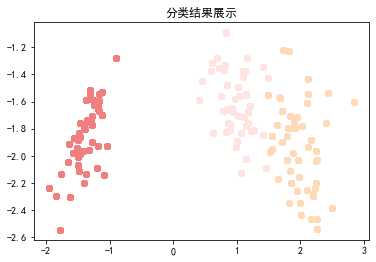

In [38]:
#二维绘图
w = getweights(2)

#存储分类结果
pred = []
for i in range(len(X)):
    pred.append(classify(X[i], w))

C = np.mat(X)
CC = C * w

newdata = pd.DataFrame(CC, columns = ['First', 'Second'])

#pred加入到数据列表的dataframe中
newdata['label'] = Y
newdata['pred'] = pred

colors = ['lightcoral','mistyrose','peachpuff','papayawhip','gold','y','darkseagreen',
         'mediumaquamarine','powderblue','lightsteelblue','slateblue','thistle',
         'lightpink'] #颜色列表
PRED = []   #存储三类数据的预测列表
j = 0
for i in labels:
    CCi = newdata.loc[newdata['label'] == i]
    CCi.index = range(len(CCi))  #重塑提取索引
    Ci = np.array(CCi)
    Pred = [] #预测结果列表
    for k in range(len(CCi)):
        if CCi['label'][k] == CCi['pred'][k]:
            Pred.append('Valid')
            plt.scatter(Ci[:, 0], Ci[:, 1], c=colors[j], marker="o")
        else:
            plt.scatter(Ci[:, 0], Ci[:, 1], c=colors[j+1], marker="o")
    j += 1
    PRED.append(Pred)

plt.title("分类结果展示")
plt.show()


如图所示，使用三分类LDA对整体进行分类，结果基本上完全正确，准确率达到0.98，故分类有效。
#### 下面观察三类数据的分类效果：

降至二维后的分类情况：

In [39]:
accuracy0 = len(PRED[0])/len(X1)
accuracy1 = len(PRED[1])/len(X2)
accuracy2 = len(PRED[2])/len(X3)

print("降至二维的三分类LDA模型对0类，1类，2类数据分类的精确度分别为：",accuracy0,accuracy1,accuracy2)
A.loc['二维LDA',:] = [accuracy0,accuracy1,accuracy2]

降至二维的三分类LDA模型对0类，1类，2类数据分类的精确度分别为： 1.0 0.96 0.98


降至三维后的分类情况：

In [40]:
PRED = []
w = getweights(3)
pred = []
for i in range(len(X1)):
    if classify(X1[i], w) == 0:
        pred.append('Valid')
PRED.append(pred)

pred = []
for i in range(len(X2)):
    if classify(X2[i], w) == 1:
        pred.append('Valid')
PRED.append(pred)

pred = []
for i in range(len(X3)):
    if classify(X3[i], w) == 2:
        pred.append('Valid')
PRED.append(pred)

accuracy0 = len(PRED[0])/len(X1)
accuracy1 = len(PRED[1])/len(X2)
accuracy2 = len(PRED[2])/len(X3)

print("降至三维的三分类LDA模型对0类，1类，2类数据分类的精确度分别为：",accuracy0,accuracy1,accuracy2)
A.loc['三维LDA',:] = [accuracy0,accuracy1,accuracy2]

降至三维的三分类LDA模型对0类，1类，2类数据分类的精确度分别为： 1.0 0.96 0.98


不降维的分类情况：

In [41]:
PRED = []
w = getweights(3)
pred = []
for i in range(len(X1)):
    if classify(X1[i], w) == 0:
        pred.append('Valid')
PRED.append(pred)

pred = []
for i in range(len(X2)):
    if classify(X2[i], w) == 1:
        pred.append('Valid')
PRED.append(pred)

pred = []
for i in range(len(X3)):
    if classify(X3[i], w) == 2:
        pred.append('Valid')
PRED.append(pred)

accuracy0 = len(PRED[0])/len(X1)
accuracy1 = len(PRED[1])/len(X2)
accuracy2 = len(PRED[2])/len(X3)

print("不降维的三分类LDA模型对0类，1类，2类数据分类的精确度分别为：",accuracy0,accuracy1,accuracy2)
A.loc['四维LDA',:] = [accuracy0,accuracy1,accuracy2]

不降维的三分类LDA模型对0类，1类，2类数据分类的精确度分别为： 1.0 0.96 0.98


OvOLDA

In [42]:
#定义LDA函数：获取两类的决策函数:获取向量w
def judge(a, b):    #a,b为类别序数
    Sw = E[a] + E[b]  #求解类内散度矩阵
    w = np.dot(np.linalg.inv(Sw),(m[a]-m[b]).reshape(4,1))
    return w

In [43]:
#获取三个分类器
w = []
for i in range(3):
    for j in range(i+1, 3):
        weight = judge(i, j)
        w.append(weight)

In [44]:
PRED = []
#开始分类

#0类数据的分类：使用分类器1和分类器3
pred = []
for i in range(len(X1)):
    d = [abs(abs(np.dot(X1[i], w[0]) - np.dot(m1, w[0]))+abs(np.dot(X1[i], w[0]) - np.dot(m2, w[0]))),
         abs(abs(np.dot(X1[i], w[2]) - np.dot(m1, w[2]))+abs(np.dot(X1[i], w[2]) - np.dot(m3, w[2])))] #存储距离以备用
    right = []
    false = []
    if abs(np.dot(X1[i], w[0]) - np.dot(m1, w[0])) < abs(np.dot(X1[i], w[0]) - np.dot(m2, w[0])):
        right.append('r1')
    else:
        false.append('r2')
    if abs(np.dot(X1[i], w[2]) - np.dot(m1, w[2])) < abs(np.dot(X1[i], w[2]) - np.dot(m3, w[2])):
        right.append('k1')
    else:
        false.append('k2')
    if len(right) > len(false):    #投票：正确分类的胜出——有效分类
        pred.append('Valid')
    elif len(false) > len(right):    #投票：错误分类的胜出——无效分类
        pred.append('InValid')
    else:    #投票：正确分类和错误分类相当：看概率 定义概率为d中的距离
        if 'r1' in right and 'k2' in false:
            if d[0] > d[1]:     #正确的概率高——有效分类
                pred.append('Valid')
            else:
                pred.append('InValid')
        else:
            if d[0] < d[1]:
                pred.append('Valid')
            else:
                pred.append('InValid')
PRED.append(pred)

#对1类和2类数据的分类同理。

#1类数据的分类：使用分类器1和分类器2
pred = []
for i in range(len(X2)):
    d = [abs(abs(np.dot(X2[i], w[0]) - np.dot(m2, w[0]))+abs(np.dot(X2[i], w[0]) - np.dot(m1, w[0]))),
         abs(abs(np.dot(X2[i], w[1]) - np.dot(m2, w[1]))+abs(np.dot(X2[i], w[1]) - np.dot(m3, w[1])))] #存储距离以备用
    right = []
    false = []
    if abs(np.dot(X2[i], w[0]) - np.dot(m2, w[0])) < abs(np.dot(X2[i], w[0]) - np.dot(m1, w[0])):
        right.append('r1')
    else:
        false.append('r2')
    if abs(np.dot(X2[i], w[1]) - np.dot(m2, w[1])) < abs(np.dot(X2[i], w[1]) - np.dot(m3, w[1])):
        right.append('k1')
    else:
        false.append('k2')
    if len(right) > len(false):
        pred.append('Valid')
    elif len(false) > len(right):
        pred.append('InValid')
    else:
        if 'r1' in right and 'k2' in false:
            if d[0] > d[1]:
                pred.append('Valid')
            else:
                pred.append('InValid')
        else:
            if d[0] < d[1]:
                pred.append('Valid')
            else:
                pred.append('InValid')
PRED.append(pred)

#2类数据的分类：使用分类器2和分类器3
pred = []
for i in range(len(X2)):
    d = [abs(abs(np.dot(X3[i], w[1]) - np.dot(m3, w[1]))+abs(np.dot(X3[i], w[1]) - np.dot(m2, w[1]))),
         abs(abs(np.dot(X3[i], w[2]) - np.dot(m3, w[2]))+abs(np.dot(X3[i], w[2]) - np.dot(m1, w[2])))] #存储距离以备用
    right = []
    false = []
    if abs(np.dot(X3[i], w[1]) - np.dot(m3, w[1])) < abs(np.dot(X3[i], w[1]) - np.dot(m2, w[1])):
        right.append('r1')
    else:
        false.append('r2')
    if abs(np.dot(X3[i], w[2]) - np.dot(m3, w[2])) < abs(np.dot(X3[i], w[2]) - np.dot(m1, w[2])):
        right.append('k1')
    else:
        false.append('k2')
    if len(right) > len(false):
        pred.append('Valid')
    elif len(false) > len(right):
        pred.append('InValid')
    else:
        if 'r1' in right and 'k2' in false:
            if d[0] > d[1]:
                pred.append('Valid')
            else:
                pred.append('InValid')
        else:
            if d[0] < d[1]:
                pred.append('Valid')
            else:
                pred.append('InValid')
PRED.append(pred)

In [45]:
c1 = collections.Counter(PRED[0])
c2 = collections.Counter(PRED[1])
c3 = collections.Counter(PRED[2])
Allaccuracy = (c1['Valid']+c2['Valid']+c3['Valid'])/len(data)

In [46]:
Allaccuracy

0.9733333333333334

使用OvOLDA进行分类，整体的分类准确率为0.97，几乎与一般三分类LDA的准确率（0.98）相同。
下面观察三类数据的分类效果：

In [47]:
accuracy0 = c1['Valid']/len(X1)
accuracy1 = c2['Valid']/len(X2)
accuracy2 = c3['Valid']/len(X3)

print("OvOLDA模型对0类，1类，2类数据分类的精确度分别为：",accuracy0,accuracy1,accuracy2)
A.loc['OvOLDA',:] = [accuracy0,accuracy1,accuracy2]

OvOLDA模型对0类，1类，2类数据分类的精确度分别为： 1.0 0.96 0.96


##### 展示总的精确度代码

In [48]:
A

,0类分类准确度,1类分类准确度,2类分类准确度
OvOLDA,1,0.96,0.96
四维LDA,1,0.96,0.98
三维LDA,1,0.96,0.98
二维LDA,1,0.96,0.98


## 结论

#### 分类效果的综合评价
1. 三分类LDA模型的总体精确度可达0.98，OvOLDA模型的总体精确度约0.97，两者相差无几，因此，对整体数据的分类效果而言，两种模型效果相近，且分类效果都很好。
2. 观察三分类LDA模型保持4维、降至3维、降至2维后对三类数据分别进行分类的效果完全相同。因此，降维与否对三分类LDA分别区分0,1,2类的效果差别不大。
3. 观察可知，对0类和1类的分类，两种LDA模型效果都完全相同。对2类的分类，OvOLDA效果略逊于三分类LDA。